Exploring Dandiset 000945: Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation

**Important:** This notebook was AI-generated using dandi-notebook-gen and has not been fully verified. Use caution when interpreting the code or results.

## Overview of the Dandiset

This notebook explores the Neural Spiking Data in the Awake Rat Somatosensory Cortex Responding to Trials of Transcranial Focused Ultrasound Stimulation, available as Dandiset 000945 on the DANDI Archive.

The data was collected by Ramachandran, Sandhya; Gao, Huan; Yu, Kai; He, Bin (2025) and is described as:

> In these recordings, we tested different PRFs (pulse repetition frequencies) of ultrasound stimulation using a 128-element random array ultrasound transducer to stimulate the somatosensory cortex of awake head-fixed rats. Chronic electrophysiological recordings were acquired using 32-channel NeuroNexus electrodes (Model: A1x32-Poly3-10mm-50-177-Z32), chronically implanted into the rat brain. Ultrasound stimulation is delivered every 2.5 seconds with a 10% jitter, and each recording has 500 trials. The PRFs tested were 30 Hz, 300 Hz, 1500 Hz, 3000 Hz, and 4500 Hz, each with a 200 microsecond pulse duration and a 67 ms ultrasound duration. Anesthetized files were performed under 2% isoflurane anesthesia for comparison.
>
> File Information
> All 10 subjects were male rats, implanted with their chronic electrode at 6 months of age and then recordings taken first at 8-10 months, and then some repeats taken at 12 months. Within each subject's folder are recordings for the different PRFs. Most subjects have 5 recordings within, one for each PRF. Some subjects have duplicate recordings taken a few months after the original ones. A few recordings were not included due to excessive noise in the recordings. Files are named in the format SubjectName_PRF_PulseDuration. Each file contains spike time data with the cell type labels included for each neurons, as well as time series data for the onset of each trial of ultrasound stimulation.

A neurosift link for this Dandiset is available here: https://neurosift.app/dandiset/001176/000945

## What this notebook covers

This notebook demonstrates how to:

*   Load the Dandiset using the DANDI API
*   Access and explore the assets (files) within the Dandiset
*   Load an NWB file from the Dandiset using remfile and pynwb
*   Explore the metadata and data contained within the NWB file
*   Visualize trial start and stop times
*   Visualize unit spike times

## Required Packages

The following packages are required to run this notebook:

*   dandi
*   pynwb
*   h5py
*   remfile
*   matplotlib
*   seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000945")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 75 assets in the dataset
\nFirst 5 assets:
- sub-BH498/sub-BH498_ses-20240306T124227_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T200606_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T191833_ecephys.nwb
- sub-BH498/sub-BH498_ses-20230906T180913_ecephys.nwb
- sub-BH498/sub-BH498_ses-20240305T204552_ecephys.nwb


## Loading an NWB file and exploring its metadata

This section demonstrates how to load an NWB file from the Dandiset and explore its metadata.
We will load the file `sub-BH497/sub-BH497_ses-20240310T143729_ecephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/`

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/a4e04662-e4cb-49f3-9076-41e04e833a11/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some metadata
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Institution: {nwb.institution}")
print(f"Subject ID: {nwb.subject.subject_id}")

Session description: Awake S1 Stimulation by tFUS
Identifier: BH498_3000_200_anes
Session start time: 2024-03-10 14:37:29-04:00
Institution: Carnegie Mellon University
Subject ID: BH497


/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.5.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Loading and visualizing trial data

This section demonstrates how to load and visualize trial data from the NWB file.

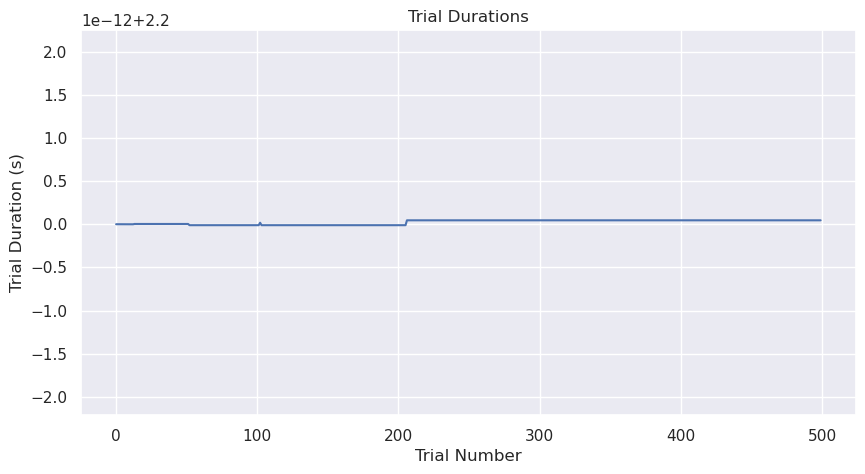

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

# Load trial start and stop times
trial_start_times = nwb.trials.start_time[:]
trial_stop_times = nwb.trials.stop_time[:]

# Plot trial durations
trial_durations = trial_stop_times - trial_start_times
plt.figure(figsize=(10, 5))
plt.plot(trial_durations)
plt.xlabel("Trial Number")
plt.ylabel("Trial Duration (s)")
plt.title("Trial Durations")
plt.show()

## Loading and visualizing unit spike times

This section demonstrates how to load and visualize unit spike times from the NWB file.

Number of units: 64
First 5 unit IDs: [0 1 2 3 4]
Cell type labels: [1. 2.]


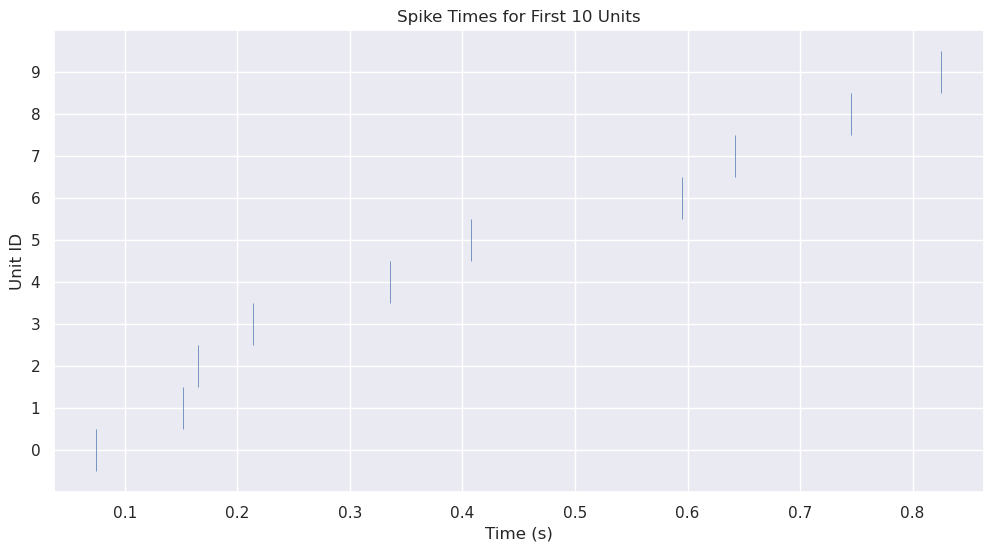

In [4]:
# Load unit spike times and cell type labels
unit_spike_times = nwb.units.spike_times[:]
unit_celltype_labels = nwb.units.celltype_label[:]
unit_ids = nwb.units.id[:]

# Print some info about the units
print(f"Number of units: {len(unit_ids)}")
print(f"First 5 unit IDs: {unit_ids[:5]}")
print(f"Cell type labels: {np.unique(unit_celltype_labels)}")

# Select the first 10 units
num_units_to_plot = 10
selected_unit_ids = unit_ids[:num_units_to_plot]

# Plot spike times for the selected units
plt.figure(figsize=(12, 6))
for unit_id in selected_unit_ids:
    # Get the spike times for this unit
    unit_index = np.where(unit_ids == unit_id)[0][0]
    spike_times = unit_spike_times[unit_index]

    # Plot the spike times as vertical lines
    plt.vlines(spike_times, unit_id - 0.5, unit_id + 0.5, linewidth=0.5)

plt.xlabel("Time (s)")
plt.ylabel("Unit ID")
plt.title(f"Spike Times for First {num_units_to_plot} Units")
plt.yticks(selected_unit_ids)
plt.show()

## Summary and Future Directions

This notebook has demonstrated how to load and explore data from Dandiset 000945, focusing on neural spiking data in the awake rat somatosensory cortex. We have shown how to:

*   Load the Dandiset and its assets using the DANDI API
*   Load an NWB file from the Dandiset
*   Access and visualize trial data
*   Access and visualize unit spike times

Future directions for analysis could include:

*   Analyzing the relationship between ultrasound stimulation and neural spiking activity
*   Comparing neural activity across different PRFs
*   Performing more advanced spike sorting and analysis
*   Investigating the effects of anesthesia on neural activity